In [1]:
import pandas as pd
import seaborn as sns

In [2]:
assets = pd.read_csv('/home/tugcenum/Desktop/jobapplication/joyn/exercise/assets.csv')
assets

,A_TYPE,A_DURATION_SEC,A_SEASON_NUM,A_EPISODE_NUM,ASSET_ID,A_TITLE_ID
0,1,5880,0,0,a_2xI,at_bSo
1,1,5460,0,0,a_6Cp,at_bSn
2,1,5820,0,0,a_4ql,at_bSm
3,2,6780,1,1,a_2yn,at_bSl
4,1,5280,0,0,a_Pi,at_bSk
...,...,...,...,...,...,...
45652,2,1440,1,2,a_51z,at_f
45653,2,1380,1,7,a_4mP,at_f
45654,1,4860,0,0,a_6gT,at_2
45655,1,4980,0,0,a_8Rc,at_1


In [3]:
usages = pd.read_csv('/home/tugcenum/Desktop/jobapplication/joyn/exercise/usages.csv')
usages['USAGE_DATETIME'] = pd.to_datetime(usages['USAGE_DATETIME'])
usages

,SUB_ID,ASSET_ID,USAGE_DATETIME,USAGE_DURATION_SEC,DEVICE_CATEGORY
0,s_8dVB,a_eG,2019-03-20 21:08:46,1336,MOBILE
1,s_8dVB,a_eG,2019-03-20 19:20:49,1224,MOBILE
2,s_8dVB,a_vl,2019-04-19 20:07:47,158,MOBILE
3,s_8dVB,a_1ID,2019-04-04 20:30:39,2460,MOBILE
4,s_8dVB,a_1Kp,2019-04-19 20:03:00,164,MOBILE
...,...,...,...,...,...
17472078,s_8cLa,a_1f0,2019-06-17 21:30:29,1356,PC
17472079,s_8cLa,a_1MX,2019-06-17 21:03:43,1402,PC
17472080,s_wLd,a_1f0,2019-06-17 21:48:03,138,STB
17472081,s_wLd,a_1MX,2019-06-17 21:20:36,1510,STB


In [4]:
usages = usages.merge(assets[['ASSET_ID','A_TITLE_ID','A_TYPE']], on = ['ASSET_ID'], how = 'left')
usages['month'] = usages.USAGE_DATETIME.dt.month
usages

,SUB_ID,ASSET_ID,USAGE_DATETIME,USAGE_DURATION_SEC,DEVICE_CATEGORY,A_TITLE_ID,A_TYPE,month
0,s_8dVB,a_eG,2019-03-20 21:08:46,1336,MOBILE,at_4JS,2,3
1,s_8dVB,a_eG,2019-03-20 19:20:49,1224,MOBILE,at_4JS,2,3
2,s_8dVB,a_vl,2019-04-19 20:07:47,158,MOBILE,at_88U,2,4
3,s_8dVB,a_1ID,2019-04-04 20:30:39,2460,MOBILE,at_25B,2,4
4,s_8dVB,a_1Kp,2019-04-19 20:03:00,164,MOBILE,at_88U,2,4
...,...,...,...,...,...,...,...,...
17472078,s_8cLa,a_1f0,2019-06-17 21:30:29,1356,PC,at_4D8,2,6
17472079,s_8cLa,a_1MX,2019-06-17 21:03:43,1402,PC,at_4D8,2,6
17472080,s_wLd,a_1f0,2019-06-17 21:48:03,138,STB,at_4D8,2,6
17472081,s_wLd,a_1MX,2019-06-17 21:20:36,1510,STB,at_4D8,2,6


In [5]:
usages.USAGE_DATETIME.min(), usages.USAGE_DATETIME.max()

(Timestamp('2019-02-18 00:00:00'), Timestamp('2019-06-17 22:43:46'))

In [23]:
monthly_watch = usages.groupby(['A_TITLE_ID','month','A_TYPE'])['USAGE_DURATION_SEC'].sum().reset_index()
monthly_watch['duration_per'] = monthly_watch.groupby('month')['USAGE_DURATION_SEC'].transform(lambda x: (x / x.sum()))
monthly_watch

,A_TITLE_ID,month,A_TYPE,USAGE_DURATION_SEC,duration_per
0,at_0,2,1,298344,0.000102
1,at_0,3,1,962668,0.000121
2,at_0,4,1,876796,0.000115
3,at_0,5,1,1011420,0.000122
4,at_0,6,1,375150,0.000089
...,...,...,...,...,...
19050,at_zz,2,2,197836,0.000068
19051,at_zz,3,2,231422,0.000029
19052,at_zz,4,2,110936,0.000015
19053,at_zz,5,2,423298,0.000051


In [26]:
monthly_type = monthly_watch.groupby(['month','A_TYPE'])['duration_per'].sum().reset_index()
monthly_type

,month,A_TYPE,duration_per
0,2,1,0.251791
1,2,2,0.748209
2,3,1,0.285699
3,3,2,0.714301
4,4,1,0.269953
5,4,2,0.730047
6,5,1,0.251777
7,5,2,0.748223
8,6,1,0.231150
9,6,2,0.768850


Text(0.5, 1.0, 'Monthly screen time share per content type')

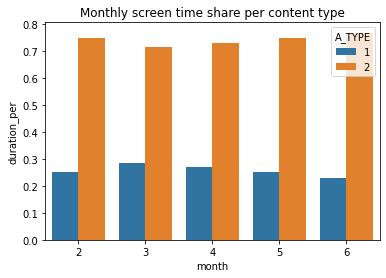

In [36]:
# series (2), movie (1)
fig = sns.barplot(data=monthly_type, x="month", y='duration_per', hue="A_TYPE")
fig.set_title('Monthly screen time share per content type')

Text(0.5, 1.0, 'Monthly preferred content types')

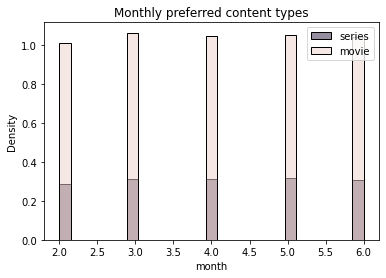

In [37]:
# series (2), movie (1)
fig = sns.histplot(data=monthly_watch, x="month", hue="A_TYPE", stat="density")
fig.legend(labels=["series","movie"])
fig.set_title('Monthly preferred content types')

In [38]:
monthly_top_contents = monthly_watch.sort_values(by = 'duration_per', ascending = False).groupby('month').head(3)
monthly_top_contents

,A_TITLE_ID,month,A_TYPE,USAGE_DURATION_SEC,duration_per
6309,at_4JS,6,2,986121948,0.233010
6308,at_4JS,5,2,1723075116,0.207549
6307,at_4JS,4,2,1069836324,0.139853
6305,at_4JS,2,2,401260688,0.137145
1622,at_1vb,2,2,254533670,0.086996
1623,at_1vb,3,2,571298660,0.071766
6306,at_4JS,3,2,463445604,0.058218
1624,at_1vb,4,2,419177638,0.054797
1625,at_1vb,5,2,400277106,0.048214
1626,at_1vb,6,2,201790004,0.047681


Text(0.5, 1.0, 'Monthly Top 3 contents')

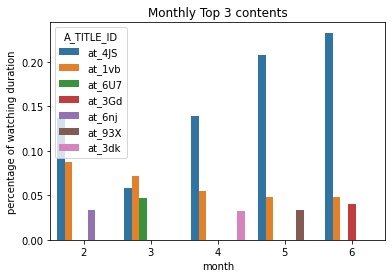

In [39]:
p = sns.barplot(x=monthly_top_contents.month, y=monthly_top_contents.duration_per, hue = monthly_top_contents.A_TITLE_ID)
p.set_ylabel("percentage of watching duration")
p.set_title('Monthly Top 3 contents')